<a href="https://colab.research.google.com/github/ialkamal/food-sales-predictions/blob/master/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Week 1

In [3]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/Coding Dojo/Fundamentals_Data_Science/sales_predictions.csv'

sales_ds = pd.read_csv(path)
sales_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Week 2

1) How many rows and columns?

In [4]:
sales_ds.shape

(8523, 12)

2) What are the datatypes of each variable?

In [5]:
sales_ds.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [6]:
sales_ds.duplicated().any()

False

4) Identify missing values.

In [7]:
sales_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
sales_ds.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

**Item Weight**

In [9]:
sales_ds.loc[sales_ds['Item_Weight'].isna(),:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [10]:
item_weight = sales_ds.loc[~sales_ds['Item_Weight'].isna(),["Item_Weight","Item_Type"]]

In [11]:
item_weight.groupby(['Item_Type'])["Item_Weight"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.277108,4.773622,4.880,8.23500,11.650,15.75,20.85
Breads,204.0,11.346936,4.440540,4.635,7.12875,10.600,14.85,20.85
Breakfast,89.0,12.768202,5.038131,6.425,8.06000,10.695,17.25,21.10
Canned,539.0,12.305705,4.586564,4.615,8.11500,12.150,16.25,21.35
Dairy,566.0,13.426069,4.686532,4.805,9.27750,13.350,17.60,20.70
Frozen Foods,718.0,12.867061,4.507383,4.555,8.93500,12.850,17.00,20.85
Fruits and Vegetables,1019.0,13.224769,4.575275,5.460,9.19500,13.100,17.10,21.35
Hard Drinks,183.0,11.400328,4.239144,4.610,8.26000,10.100,14.85,19.70
Health and Hygiene,430.0,13.142314,4.512313,5.175,9.69500,12.150,17.60,21.25


In [12]:
item_weight.groupby(['Item_Type'])["Item_Weight"].std()

Item_Type
Baking Goods             4.773622
Breads                   4.440540
Breakfast                5.038131
Canned                   4.586564
Dairy                    4.686532
Frozen Foods             4.507383
Fruits and Vegetables    4.575275
Hard Drinks              4.239144
Health and Hygiene       4.512313
Household                4.998845
Meat                     4.670812
Others                   4.225534
Seafood                  5.473830
Snack Foods              4.531256
Soft Drinks              4.403699
Starchy Foods            4.010061
Name: Item_Weight, dtype: float64

After reviewing the data, the mean looks like a good measure to fill the missing values as the average weight is very close between different item types as well as the standard deviation is relatively small and consistent, meaning that the item actual weights are close to the mean. 

In [13]:
item_weight['Item_Weight'].mean()

12.857645184136183

In [14]:
sales_ds['Item_Weight'].fillna(item_weight['Item_Weight'].mean(), inplace = True)

In [15]:
sales_ds.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Outlet Size**

In [16]:
sales_ds.groupby(['Outlet_Size',"Outlet_Type"])[["Item_Outlet_Sales"]].describe()

Item_Outlet_Sales  ...            
                                          count  ...         max
Outlet_Size Outlet_Type                          ...            
High        Supermarket Type1             932.0  ...  10256.6490
Medium      Supermarket Type1             930.0  ...   7646.0472
            Supermarket Type2             928.0  ...   6768.5228
            Supermarket Type3             935.0  ...  13086.9648
Small       Grocery Store                 528.0  ...   1482.0708
            Supermarket Type1            1860.0  ...   9779.9362

[6 rows x 8 columns]

In [17]:
outlet_na = sales_ds.loc[sales_ds["Outlet_Size"].isna(),['Outlet_Size',"Outlet_Type","Item_Outlet_Sales"]]

In [18]:
outlet_na.groupby(["Outlet_Type"])[["Item_Outlet_Sales"]].describe()

Item_Outlet_Sales               ...                      
                              count         mean  ...        75%        max
Outlet_Type                                       ...                      
Grocery Store                 555.0   339.351662  ...   455.4072  1775.6886
Supermarket Type1            1855.0  2266.410119  ...  3020.0688  9664.7528

[2 rows x 8 columns]

The features most related to Outlet Size is Outlet Type and Item Outlet Sales.

Observations:
1.  Only Supermarkets Type1 and Grocery Stores have missing values
2.  From the data that is not missing: 
*   All grocery stores have a small size. 
*   Supermarket Type 1 can be either Small, Medium or High
3. I would assume that accounting and reporting would be a bit harder for small sized supermarkets. Medium and Larger sized supermarkets would probably have automated systems to calculate inventory.

Result:
I would think that replacing the missing values with "Small" would be the right way to go.

In [19]:
sales_ds['Outlet_Size'].fillna("Small", inplace = True)

6) Confirm that there are no missing values after addressing them.

In [20]:
sales_ds.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [21]:
sales_ds["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
sales_ds["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [23]:
sales_ds["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [24]:
sales_ds["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [25]:
sales_ds["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [26]:
sales_ds["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Only the "Item Fat Content" column seems to have inconsistent data.

In [27]:
sales_ds["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
f1 = sales_ds["Item_Fat_Content"] == "LF"
f2 = sales_ds["Item_Fat_Content"] == "low fat"
f3 = sales_ds["Item_Fat_Content"] == "reg"
sales_ds.loc[f1 | f2,["Item_Fat_Content"]] = "Low Fat"
sales_ds.loc[f3,["Item_Fat_Content"]] = "Regular"

In [29]:
sales_ds["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [30]:
sales_ds.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [31]:
sales_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [32]:
sales_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Week 3

In [33]:
sales_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

1. Histogram to view the distributions of various features in your dataset.

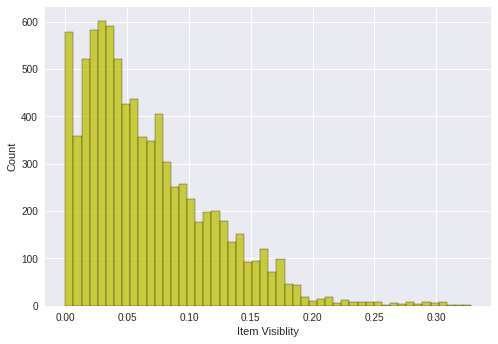

In [35]:
iv = sns.histplot(x="Item_Visibility",data=sales_ds,color='y')
iv.set(xlabel="Item Visiblity")
plt.show()

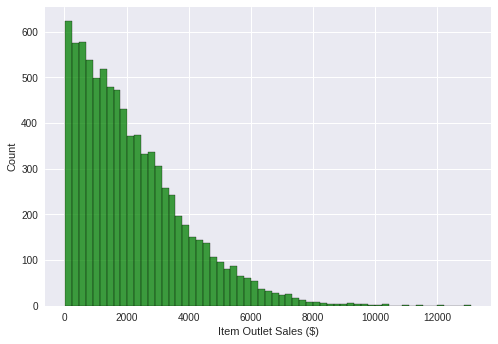

In [36]:
ip = sns.histplot(x="Item_Outlet_Sales",data=sales_ds,color='g')
ip.set(xlabel="Item Outlet Sales ($)")
plt.show()

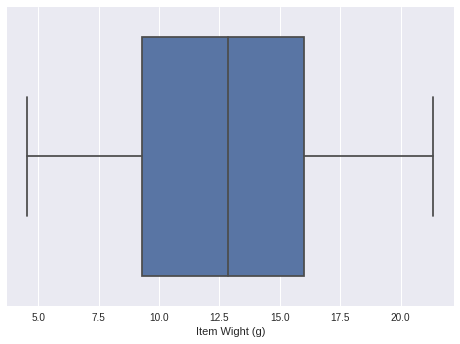

In [37]:
iw = sns.boxplot(x="Item_Weight",data=sales_ds)
iw.set(xlabel="Item Wight (g)")
plt.show()

2. Boxplot to view statistical summaries of various features in your dataset.

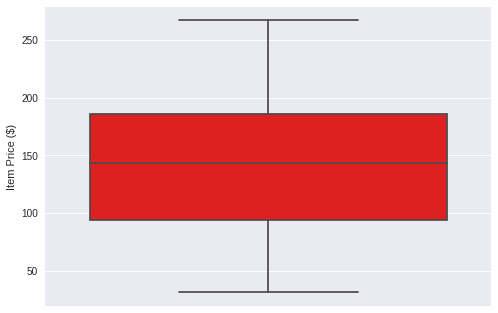

In [38]:
ip = sns.boxplot(y="Item_MRP",data=sales_ds,color='r')
ip.set(ylabel="Item Price ($)")
plt.show()

3. Heatmap of the correlation between features.

In [39]:
corr = sales_ds.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


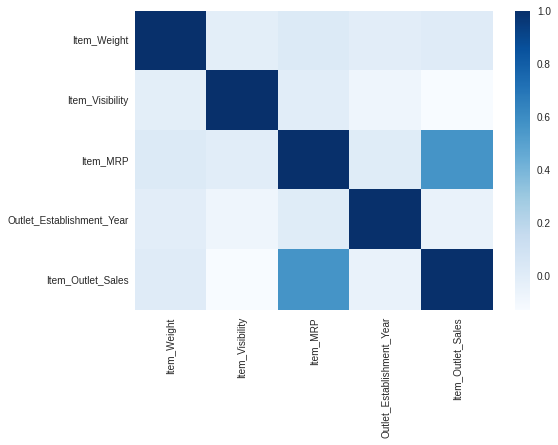

In [40]:
sns.heatmap(corr,cmap="Blues")

## Week 4

### Q1. Do more visible items sell more?

Calculate how many units did we sell of each item. This equals to the total Sales of Each Item in the outlet divided by the Item's maximum retail price.

In [41]:
items_visiblity = sales_ds.sort_values(by='Item_Visibility')
est_qty_sold = pd.DataFrame({'Estimated_Quantity_Sold':np.round(np.divide(items_visiblity['Item_Outlet_Sales'],items_visiblity['Item_MRP']),0)})
items_visiblity = pd.concat([items_visiblity,est_qty_sold], join = 'outer', axis = 1)
items_visiblity

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Estimated_Quantity_Sold
596,FDU04,7.930000,Low Fat,0.000000,Frozen Foods,123.2414,OUT018,2009,Medium,Tier 3,Supermarket Type2,487.3656,4.0
5881,NCP17,19.350000,Low Fat,0.000000,Health and Hygiene,65.3168,OUT010,1998,Small,Tier 3,Grocery Store,191.7504,3.0
3255,FDI38,13.350000,Regular,0.000000,Canned,206.9638,OUT017,2007,Small,Tier 2,Supermarket Type1,7247.2330,35.0
3257,FDS55,7.020000,Low Fat,0.000000,Fruits and Vegetables,148.1734,OUT018,2009,Medium,Tier 3,Supermarket Type2,890.8404,6.0
3259,NCP55,14.650000,Low Fat,0.000000,Others,53.8614,OUT035,2004,Small,Tier 2,Supermarket Type1,1105.2280,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,NCE31,7.670000,Low Fat,0.309390,Household,33.2216,OUT010,1998,Small,Tier 3,Grocery Store,138.4864,4.0
7250,FDT24,12.350000,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,Small,Tier 3,Grocery Store,154.4656,2.0
1805,FDJ56,12.857645,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400,2.0
3750,NCZ18,12.857645,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094,3.0


Find the correlation between the Estimated Quantity Sold and the Item Visiblity

In [42]:
corr1 = items_visiblity['Item_Visibility'].corr(items_visiblity['Estimated_Quantity_Sold'])
corr1

-0.16093090968909968

(array([1, 2]), <a list of 2 Text major ticklabel objects>)

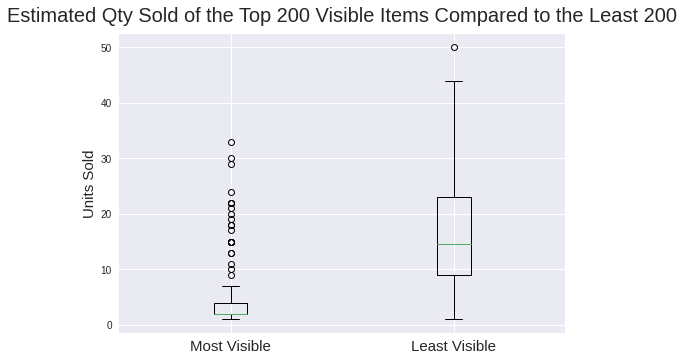

In [43]:
most_visible = items_visiblity.tail(200)
least_visible = items_visiblity.head(200)
plt.boxplot([most_visible['Estimated_Quantity_Sold'],least_visible['Estimated_Quantity_Sold']],labels=["Most Visible", "Least Visible"])
plt.title('Estimated Qty Sold of the Top 200 Visible Items Compared to the Least 200',size=20,y=1.02)
plt.ylabel("Units Sold",size=15)
plt.xticks(fontsize=15)

From the graph above comparing the 200 most visible items with the least 200 visible items, it seems that the more visible items sell a bit less than the less visible items which is quite surprising. There maybe something wrong with the visibilty data especially anything that has a visiblity of 0.

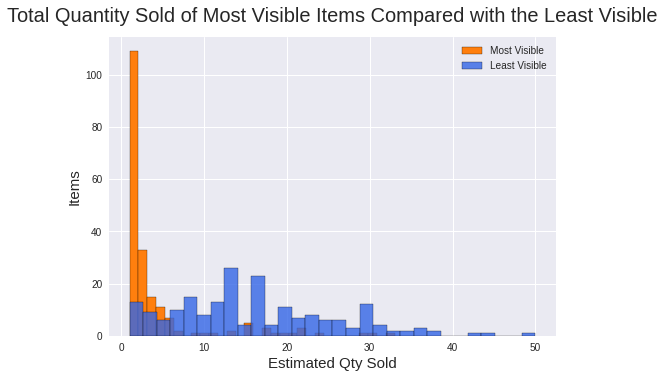

In [44]:
sns.histplot(most_visible['Estimated_Quantity_Sold'],facecolor='tab:orange',bins=30)
sns.histplot(least_visible['Estimated_Quantity_Sold'],facecolor=(0.2, 0.4, 0.9, 0.8),bins=30)
plt.title("Total Quantity Sold of Most Visible Items Compared with the Least Visible",size=20,y=1.03)
plt.xlabel("Estimated Qty Sold",size=15)
plt.ylabel("Items",size=15)
plt.legend(['Most Visible','Least Visible'])

### Q2. Do Low Fat Items gross more in sales?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([1, 2]), <a list of 2 Text major ticklabel objects>)

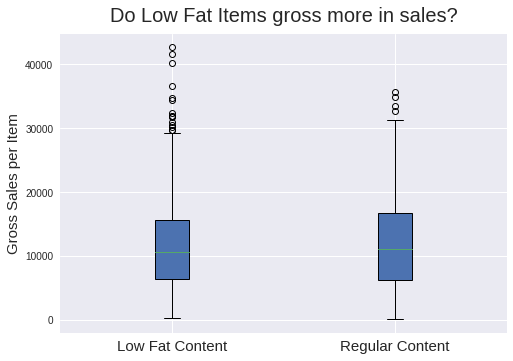

In [45]:
items_total_sales = sales_ds.groupby(['Item_Identifier','Item_Fat_Content','Item_Type'])['Item_Outlet_Sales'].sum().reset_index(name='Item_Total_Sales').sort_values(by='Item_Total_Sales',ascending=False)
plt.boxplot([items_total_sales.loc[items_total_sales['Item_Fat_Content']=='Low Fat',['Item_Total_Sales']],items_total_sales.loc[items_total_sales['Item_Fat_Content']=='Regular',['Item_Total_Sales']]],labels=['Low Fat Content','Regular Content'],patch_artist=True)
plt.title("Do Low Fat Items gross more in sales?",size=20,y=1.02)
plt.ylabel("Gross Sales per Item",size=15)
plt.xticks(fontsize=15)

There is no significant different in gross sales between low fat content items and regular content items with a number of low fat content outliers grossing much more than their regular counterparts.

### Q3. What outlets do better in terms of total item sales?

Text(0, 0.5, 'Total Item Sales')

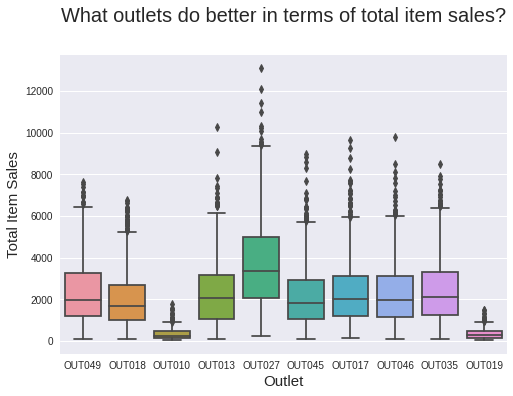

In [46]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales_ds)
plt.title("What outlets do better in terms of total item sales?",size=20,y=1.09)
plt.xlabel("Outlet", size=15)
plt.ylabel("Total Item Sales",size=15)

The data indicates that Outlet 27 outperforms the others in terms of item sales and both outlets 10 and 19 underperforms. Why?

In [47]:
out27 = sales_ds.loc[ sales_ds['Outlet_Identifier']=="OUT027", : ]
out27.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.857645,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [48]:
out10 = sales_ds.loc[ sales_ds['Outlet_Identifier']=="OUT010", : ]
out10.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,Small,Tier 3,Grocery Store,732.38


In [49]:
out19 = sales_ds.loc[ sales_ds['Outlet_Identifier']=="OUT019", : ]
out19.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876


Evident from the data above that Outlet 27 is a supermarket while outlets 10 and 19 are just grocery stores.

### Q4. Do more expensive items bring in more sales?

In [50]:
ot =  sales_ds.groupby('Item_Type')[['Item_MRP','Item_Outlet_Sales']].mean()
ot

,Item_MRP,Item_Outlet_Sales
Item_Type,,
Baking Goods,126.380766,1952.971207
Breads,140.952669,2204.132226
Breakfast,141.788151,2111.808651
Canned,139.763832,2225.194904
Dairy,148.499208,2232.542597
Frozen Foods,138.503366,2132.867744
Fruits and Vegetables,144.581235,2289.009592
Hard Drinks,137.077928,2139.221622
Health and Hygiene,130.818921,2010.000265


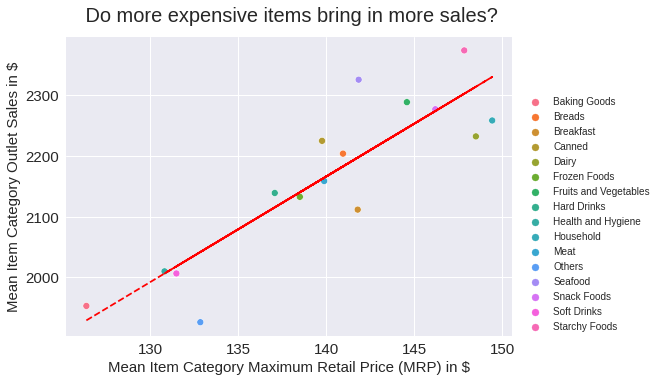

In [51]:
x = ot['Item_MRP']
y= ot['Item_Outlet_Sales']
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=ot,hue='Item_Type')
# Create trend line to show positive correlation between Item MRP and Item Outlet Sales
# Plotted mean grouped by category
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.title(" Do more expensive items bring in more sales?",size=20,y=1.03)
plt.xlabel("Mean Item Category Maximum Retail Price (MRP) in $",size=15)
plt.ylabel("Mean Item Category Outlet Sales in $",size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=(1.02,0))

The data shows that more expensive items gross more in sales. This needs more investigation to justify the findings

## Week 5

##### Use the data you have cleaned in previous weeks. 

In [52]:
sales_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
sales_ds.shape

(8523, 12)

##### Spend time transforming your categorical variables into numbers and use dummy encoding where appropriate.

In [54]:
sales_ds_ohe = pd.get_dummies(sales_ds,drop_first=True,columns=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"])
sales_ds_ohe

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
2,FDN15,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,NCD19,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8519,FDS36,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0


##### Assign the "Item_Outlet_Sales" column as your target and the rest of the variables as your features matrix.  

In [55]:
X = sales_ds_ohe.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
X.shape

(8523, 43)

In [56]:
y = sales_ds_ohe['Item_Outlet_Sales']
y.shape

(8523,)

##### Be sure to train test split your data set!

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [59]:
len(X_train)

6392

In [60]:
len(X_test)

2131

##### Build a linear regression model.

In [61]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

##### Evaluate your test set results using r2.

In [63]:
train_score = reg.score(X_train,y_train)
train_score

0.5615551419174629

In [64]:
test_score = reg.score(X_test,y_test)
test_score

0.5671041872384914

Linear Regression did well in R^2 test score as compared to the training score

##### Evaluate your test set results using RMSE

In [65]:
train_rmse = np.sqrt(mean_squared_error(y_train,train_preds))
train_rmse

1139.1040937388918

In [66]:
test_rmse = np.sqrt(mean_squared_error(y_test,test_preds))
test_rmse

1092.8630817241492

Linear Regression did well in RMSE test score as compared to the training score

##### Which features are most associated with higher predicted sales?

In [67]:
corr = sales_ds_ohe.corrwith(sales_ds_ohe['Item_Outlet_Sales'])
corr.sort_values(ascending=False).iloc[1:6]

Item_MRP                         0.567574
Outlet_Type_Supermarket Type3    0.311192
Outlet_Identifier_OUT027         0.311192
Outlet_Size_Medium               0.204701
Outlet_Type_Supermarket Type1    0.108765
dtype: float64

The top 3 indicators of higher predicated sales are Item MRP, Outlet Supermarket Type 3 and Outlet No 27.

In [68]:
corr.sort_values(ascending=False)

Item_Outlet_Sales                  1.000000
Item_MRP                           0.567574
Outlet_Type_Supermarket Type3      0.311192
Outlet_Identifier_OUT027           0.311192
Outlet_Size_Medium                 0.204701
Outlet_Type_Supermarket Type1      0.108765
Outlet_Location_Type_Tier 2        0.058261
Outlet_Establishment_Year_2004     0.052823
Outlet_Identifier_OUT035           0.052823
Outlet_Location_Type_Tier 3        0.046376
Outlet_Identifier_OUT049           0.034264
Outlet_Establishment_Year_1999     0.034264
Outlet_Identifier_OUT017           0.032610
Outlet_Establishment_Year_2007     0.032610
Item_Type_Fruits and Vegetables    0.025950
Outlet_Identifier_OUT013           0.024170
Outlet_Establishment_Year_1987     0.024170
Item_Type_Snack Foods              0.022782
Outlet_Establishment_Year_1997     0.019803
Outlet_Identifier_OUT046           0.019803
Item_Fat_Content_Regular           0.018719
Item_Type_Household                0.015701
Item_Type_Starchy Foods         

## Week 6

In [244]:
y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Prepare a function to quickly evaluate the performance of machcine learning models

In [85]:
def evaluate_models(model,X,y):

  y_preds = model.predict(X)

  r2 = model.score(X,y)
  rmse = np.sqrt(mean_squared_error(y,y_preds))

  print(f"R2 score: {'{:.2%}'.format(r2)} and RMSE: ${'{:.2f}'.format(rmse)}")

Prepare a baseline model for comparison using the mean.

In [72]:
from sklearn.dummy import DummyRegressor

dr = DummyRegressor(strategy='mean')
dr.fit(X_train,y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

Calculate score for baseline model

In [87]:
print("Train Scores on Baseline model:\n")
evaluate_models(dr,X_train,y_train)

Train Scores on Baseline model:

R2 score: 0.00% and RMSE: $1720.31


In [88]:
print("Test Scores on Baseline model:\n")
evaluate_models(dr,X_test,y_test)

Test Scores on Baseline model:

R2 score: -0.48% and RMSE: $1664.98


Calculate score for the Linear Regression model (again for quick comparison)

In [89]:
print("Train Scores on the Linear Regression model:\n")
evaluate_models(reg,X_train,y_train)

Train Scores on the Linear Regression model:

R2 score: 56.16% and RMSE: $1139.10


In [90]:
print("Test Scores on the Linear Regression model:\n")
evaluate_models(reg,X_test,y_test)

Test Scores on the Linear Regression model:

R2 score: 56.71% and RMSE: $1092.86


Create a Decision Tree model

In [91]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [94]:
print("Train Scores on the Decision Tree model:\n")
evaluate_models(dtr,X_train,y_train)

Train Scores on the Decision Tree model:

R2 score: 100.00% and RMSE: $0.00


In [95]:
print("Test Scores on the Deccision Tree model:\n")
evaluate_models(dtr,X_test,y_test)

Test Scores on the Deccision Tree model:

R2 score: 18.84% and RMSE: $1496.40


The model is overfit, let's get the depth and perform some parameter tuning

In [96]:
dtr.get_depth()

45

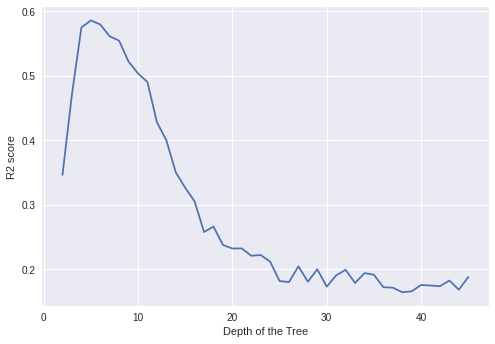

In [99]:
depth_trials = list(range(2,46))
r2 = []

for d in depth_trials:
  dtr = DecisionTreeRegressor(random_state=42,max_depth=d)
  dtr.fit(X_train,y_train)
  r2.append(dtr.score(X_test,y_test))

plt.plot(depth_trials,r2)
plt.xlabel("Depth of the Tree")
plt.ylabel("R2 score")
plt.show()

In [101]:
optimal_depth = r2.index(max(r2))+2
optimal_depth

5

In [103]:
dtr = DecisionTreeRegressor(random_state=42,max_depth=5)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [104]:
print("Train Scores on the Decision Tree model:\n")
evaluate_models(dtr,X_train,y_train)

Train Scores on the Decision Tree model:

R2 score: 61.21% and RMSE: $1071.49


In [105]:
print("Test Scores on the Decision Tree model:\n")
evaluate_models(dtr,X_test,y_test)

Test Scores on the Deccision Tree model:

R2 score: 58.57% and RMSE: $1069.13


Create a Bagging Tree model

In [240]:
from sklearn.ensemble import BaggingRegressor

btr = BaggingRegressor(random_state=42,n_estimators=100,bootstrap_features=True)
btr.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [241]:
print("Train Scores on the Bagging Tree model:\n")
evaluate_models(btr,X_train,y_train)

Train Scores on the Bagging Tree model:

R2 score: 92.04% and RMSE: $485.47


In [242]:
print("Test Scores on the Bagging Tree model:\n")
evaluate_models(btr,X_test,y_test)

Test Scores on the Bagging Tree model:

R2 score: 55.23% and RMSE: $1111.40


Create a Random Forest model

In [233]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42,n_estimators=200,max_depth=5,min_samples_leaf=6)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [234]:
print("Train Scores on the Random Forest model:\n")
evaluate_models(rfr,X_train,y_train)

Train Scores on the Random Forest model:

R2 score: 61.60% and RMSE: $1066.02


In [235]:
print("Test Scores on the Random Forest model:\n")
evaluate_models(rfr,X_test,y_test)

Test Scores on the Random Forest model:

R2 score: 60.68% and RMSE: $1041.61


Feature Importance

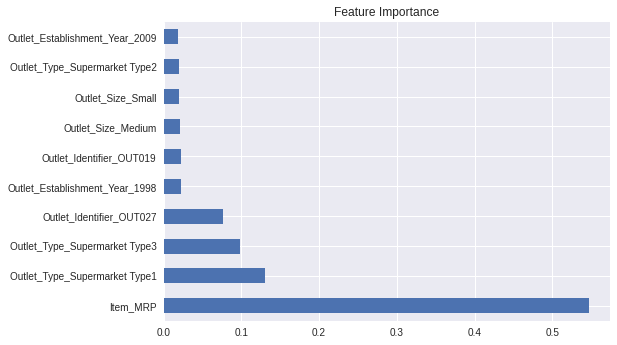

In [252]:
features = pd.Series(rfr.feature_importances_,index=X.columns)
features.sort_values(ascending=False,inplace=True)
features.nlargest(10).plot(kind='barh',title="Feature Importance")

When comparing the 4 models with the Baseline:

1.   Baseline: R2: -.48% , RMSE: 1,664.98
2.   Linear Regression: R2: 56.71% , RMSE: 1,092.86
3. Decision Tree: R2: 58.57% , RMSE: 1,069.13
4. Bagging Trees: R2: 55.23% , RMSE: 1,111.40
5. Random Forest: R2: 60.68% , RMSE: 1,041.61

**Random Forests** did the best with an R^2 score of 60.68% and a mean sqaure error of 1,041.61